In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

import datetime
from dateutil.parser import parse
from matplotlib import rc

import math
import os
import copy
import pickle

import itertools
import operator

In [2]:
# Read in data (from pickle file)
file = open('drug_data.dms','rb')
drug_data = pickle.load(file)

In [3]:
drug_data.head()

,transaction_id,vendor_id,vendor_name,bitcoin,USD,product_description,date,drug_prediction
9430,'10528,590,superclr,0,416.00,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,[heroin]
9431,'10529,590,superclr,0,416.00,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,[heroin]
9432,'10530,1013,REAL_MEGASTORE,0,3.12,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9433,'10531,1013,REAL_MEGASTORE,0,3.12,?CRAVETV.CA? PREMIUM,2018-12-27 06:43:06,[]
9435,'10533,92,OnionKings,0,109.12,Rivotril 2mg från apotek (Roche) [100st],2018-12-21 06:43:11,[benzodiazepines]


## Drug Costs Analysis

### Average Cost for a given drug

In [4]:
#Create dataframe with just vendor id, vendor name, USD, drug_prediction 
drugs_df = copy.deepcopy(drug_data.iloc[:,[1,2,4,6,7]])
drugs_df.columns = ['vendor_id','vendor_name','USD','date','drug_prediction']

In [5]:
drugs_df.head()

,vendor_id,vendor_name,USD,date,drug_prediction
9430,590,superclr,416.00,2018-11-02 06:43:01,[heroin]
9431,590,superclr,416.00,2018-11-10 06:43:01,[heroin]
9432,1013,REAL_MEGASTORE,3.12,2018-12-27 06:43:06,[]
9433,1013,REAL_MEGASTORE,3.12,2018-12-27 06:43:06,[]
9435,92,OnionKings,109.12,2018-12-21 06:43:11,[benzodiazepines]


In [6]:
subset = drugs_df[['USD','drug_prediction']]
tuples = list([tuple(x) for x in subset.values])


#function to convert list to string
def flatten(drug_list):
    str1 = ''.join(drug_list)
    return str1


drugs_df['drug_cats'] = drugs_df.iloc[:,4].apply(flatten)

In [7]:
drugs_df.head()

,vendor_id,vendor_name,USD,date,drug_prediction,drug_cats
9430,590,superclr,416.00,2018-11-02 06:43:01,[heroin],heroin
9431,590,superclr,416.00,2018-11-10 06:43:01,[heroin],heroin
9432,1013,REAL_MEGASTORE,3.12,2018-12-27 06:43:06,[],
9433,1013,REAL_MEGASTORE,3.12,2018-12-27 06:43:06,[],
9435,92,OnionKings,109.12,2018-12-21 06:43:11,[benzodiazepines],benzodiazepines


In [8]:
#Get average USD grouped by drug
average_price_of_drug = pd.DataFrame(drugs_df.groupby('drug_cats', as_index=False)['USD'].mean())

average_price_of_drug.head()

,drug_cats,USD
0,,327.449813
1,amphetamine,153.853015
2,antidepressants,13.520000
3,benzodiazepines,204.857975
4,benzodiazepinesnot_drugs,53.352571


NameError: name 'rand_color' is not defined

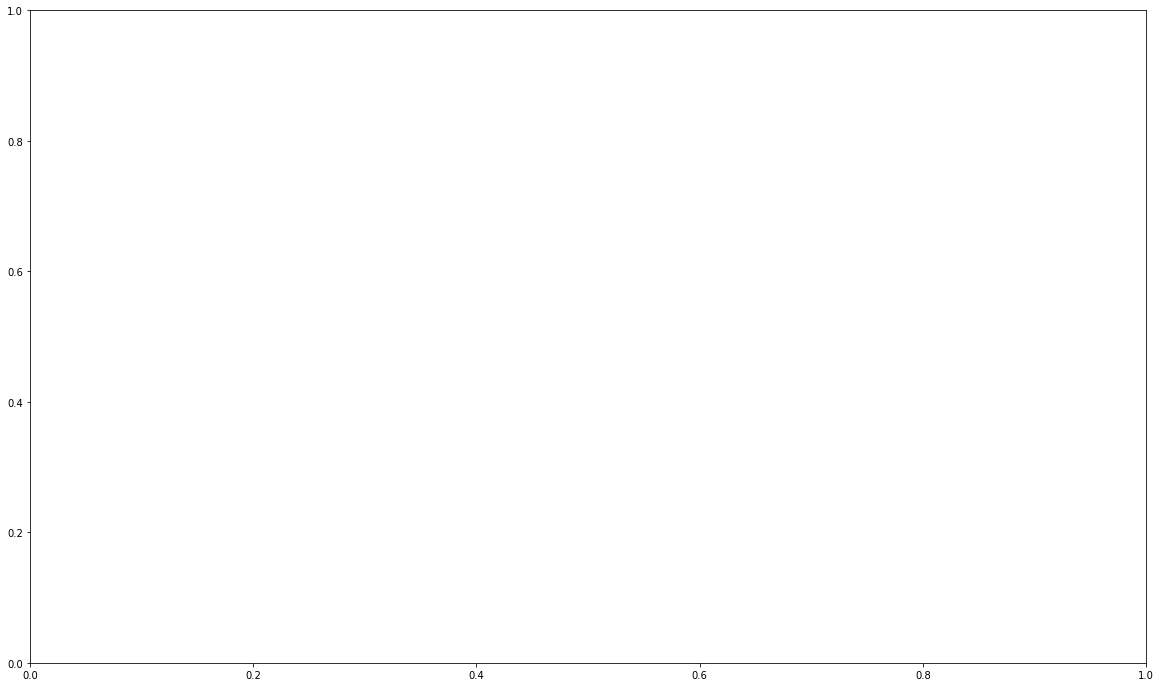

In [9]:
#Plot average prices
fig, ax = plt.subplots(figsize=(20,12))  

average_price_of_drug.plot.bar(x='drug_cats',
                                 y='USD', 
                                 ax=ax, 
                                 color = rand_color.generate())

plt.show()

### Get drug distribution of revenue for each vendor 

In [0]:
#Get the sum of revenue for a given category per vendor
sum_of_revenue_per_vendor = pd.DataFrame(drugs_df.groupby([drugs_df.vendor_name,drugs_df.drug_cats]).USD.sum())

In [0]:
sum_of_revenue_per_vendor.head()

In [0]:
#Reset index
new_sum_of_revenue_per_vendor = sum_of_revenue_per_vendor.reset_index()

In [0]:
# new_sum_of_revenue_per_vendor.head()
new_sum_of_revenue_per_vendor

## Create Stacked Plot of Revenue per drug


In [0]:
# get unique drug categories
_ , drug_categories = pd.factorize(drugs_df['drug_cats'], sort = True)
# drug_categories

# get unique vendor names
_ , vendor_list = pd.factorize(drugs_df['vendor_name'], sort = True)

# print (vendor_list)

In [0]:
#Color generator
from tqdm import tqdm
import randomcolor
rand_color = randomcolor.RandomColor()
# print(rand_color.generate())

In [0]:
%matplotlib inline
import matplotlib

matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,9))  

#list of vendors
vendors = new_sum_of_revenue_per_vendor['vendor_name'].drop_duplicates()

#distance from x axis
margin_bottoms = np.zeros(len(new_sum_of_revenue_per_vendor['drug_cats'].drop_duplicates()))
# print (margin_bottom)
# colors = ["#006D2C", "#31A354","#74C476"]

#Drug categories
drug_categories

#For loop that generates bars
for num, vendor in tqdm(enumerate(vendors)):
#     print(vendor)
    
    #values is the list of revenues for a given vendor
#     values = list(new_sum_of_revenue_per_vendor[new_sum_of_revenue_per_vendor['vendor_name'] == vendor].loc[:, 'USD'])
    vendor_subset = new_sum_of_revenue_per_vendor[new_sum_of_revenue_per_vendor['vendor_name'] == vendor]
    
    # drug_categories
    value_dict = {cat:0 for cat in drug_categories}
    for idx, row in vendor_subset.iterrows():
        drug_cat = row['drug_cats']
        value = row['USD']
        value_dict[drug_cat] = value
    
    values = list(value_dict.values())
    
#     dict_df = pd.DataFrame(value_dict, index = [0])
    dict_df = pd.DataFrame(value_dict, index = [0]).transpose().reset_index()
    
    dict_df.plot.bar(x='index',
                                 y=0, 
                                 ax=ax,
                                 stacked=True, 
                                 bottom = margin_bottoms, 
                                 color = rand_color.generate(), 
                                 label=vendor)
    
#     new_sum_of_revenue_per_vendor[new_sum_of_revenue_per_vendor['vendor_name'] == vendor].plot.bar(x='drug_cats',
#                                  y='USD', 
#                                  ax=ax,
#                                  stacked=True, 
#                                  bottom = margin_bottoms, 
#                                  color = rand_color.generate(), 
#                                  label=vendor)
    
    margin_bottoms += values
    
plt.show()

In [0]:
# # drug_categories
# value_dict = {cat:0 for cat in drug_categories}
# for idx, row in mini_df.iterrows():
#     drug_cat = row['drug_cats']
#     value = row['USD']
#     value_dict[drug_cat] = value

In [0]:
# ## Sample

# data2 = [['d1','d1','d1','d2','d2','d2','d3','d3','d3'],
#         ['v1', 'v2', 'v3', 'v1', 'v2', 'v3', 'v1', 'v2', 'v3'],
#         [1, 2, 3, 4, 5, 6, 7, 8, 9]]

# rows = zip(data2[0], data2[1], data2[2])
# headers = ['cat', 'vend', 'usd']
# df2 = pd.DataFrame(rows, columns=headers)

# fig, ax = plt.subplots(figsize=(10,7))  

# vends = df2['vend'].drop_duplicates()
# margin_bottom = np.zeros(len(df2['cat'].drop_duplicates()))
# colors = ["#006D2C", "#31A354","#74C476"]


# for num, vend in enumerate(vends):
#     #values is the list of values for a given month
#     values = list(df2[df2['vend'] == vend].loc[:, 'usd'])
# #     print (values)
#     df2[df2['vend'] == vend].plot.bar(x='cat',y='usd', ax=ax, stacked=True, 
#                                     bottom = margin_bottom, color=colors[num], label=vend)
#     margin_bottom += values

# plt.show()

# df2.shape

## Calculate total revenue per vendor

In [0]:
#Create dictionary for total revenue for each vendor
total_revenue = new_sum_of_revenue_per_vendor.groupby([new_sum_of_revenue_per_vendor.vendor_name]).USD.sum()

In [0]:
#Create a function that gets total revenue per vendor
def getTotalRevenue(vendor):
    for key, value in total_revenue.items():
        if vendor == key:
            return (value)

In [0]:
#Apply getTotalRevenue function
new_sum_of_revenue_per_vendor['total_revenue'] = new_sum_of_revenue_per_vendor.iloc[:,0].apply(getTotalRevenue)

In [0]:
new_sum_of_revenue_per_vendor.head()

In [0]:
new_sum_of_revenue_per_vendor

In [0]:
#Get the percentage of revenue per drug per vendor
new_sum_of_revenue_per_vendor['percentage_of_revenue'] = np.divide(new_sum_of_revenue_per_vendor['USD'], new_sum_of_revenue_per_vendor['total_revenue'])

In [0]:
new_sum_of_revenue_per_vendor['percentage_of_total_revenue'] = np.divide(new_sum_of_revenue_per_vendor['total_revenue'], total_revenue)

In [0]:
#Make copy of dataframe
revenue_summary_df = new_sum_of_revenue_per_vendor.copy()

# revenue_summary_df.head()

In [0]:
#Set index to vendor name
# revenue_summary_df = revenue_summary_df.set_index('vendor_name')

# revenue_summary_df.head()
#Drop duplicate vendor names
revenue_summary_df = revenue_summary_df.loc[~revenue_summary_df.index.duplicated(keep='first')]

#Reset index of dataframe
revenue_summary_df = revenue_summary_df.reset_index()

In [0]:
revenue_summary_df.head()

## Total Revenue Per Vendor

In [0]:
# REVENUE STATISTICS

#Min, Max, Average, Total revenue
minimum_rev = revenue_summary_df.total_revenue.min()
maximum_rev = revenue_summary_df.total_revenue.max()
average_rev = revenue_summary_df.total_revenue.mean()

print ('REVENUE STATISTICS:')
print ('Minimum: ' , minimum_rev)
print ('Maximum: ' , maximum_rev)
print ('Average: ' , average_rev)
print ('Total: ' , total, '\n')


#max and min rev among vendors
print ('Min revenue vendor: ' , revenue_summary_df.loc[revenue_summary_df.total_revenue.idxmin()], '\n')
print ('Max revenue vendor: ', revenue_summary_df.loc[revenue_summary_df.total_revenue.idxmax()])


In [0]:
#How much revenue does each vendor generate in Dream Market?

fig, ax = plt.subplots(figsize=(15,9))  

fig.suptitle('TOTAL REVENUE PER VENDOR', fontsize=20)

# ylim(top=20000)  # adjust the top leaving bottom unchanged

# df.groupby(['Id']).median().sort_values("Speed").plot.bar()
revenue_summary_df.sort_values("total_revenue",ascending = False).plot.bar(
                                 y='total_revenue', 
                                 ax=ax, 
                                 color = rand_color.generate())
plt.ylim([0, 30000])
ax.set_xticklabels([])
ax.set_ylabel('TOTAL REVENUE')
ax.set_xlabel('VENDORS')

plt.show()

## Percentage of market revenue per vendor

In [0]:
# revenue_summary_df.percentage_of_total_revenue

In [0]:
#What percentage of total market revenue does each vendor make?

fig, ax = plt.subplots(figsize=(15,9))  
fig.suptitle('PERCENTAGE OF MARKET REVENUE PER VENDOR', fontsize=20)

revenue_summary_df.sort_values("percentage_of_total_revenue",ascending = False).plot.bar(
                                 y='percentage_of_total_revenue', 
                                 ax=ax, 
                                 color = rand_color.generate())
plt.ylim([0.0, 0.01])
ax.set_xticklabels([])
ax.set_ylabel('PERCENT OF REVENUE')
ax.set_xlabel('VENDORS')

plt.show()

#Key takeaways: 
    # - vendor with most revenue generates .8% of total market revenue so it is not dominated by single vendor

In [0]:
# #How much revenue is each vendor making in entire market

# #Get unique vendors


# fig, ax = plt.subplots(figsize=(15,9))  

# new_sum_of_revenue_per_vendor.plot.bar(x='vendor_name',
#                                  y='percentage_of_revenue', 
#                                  ax=ax, 
#                                  color = rand_color.generate())

# plt.show()

In [0]:

# total_revenue = new_sum_of_revenue_per_vendor['USD'].sum()

In [0]:
# vendor_list

In [0]:
# #Create a dataframe with cols = cats; rows = vendors
# total_revenue_table = pd.DataFrame(columns = drug_categories)

# #Insert vendor name column
# total_revenue_table.insert(0, "Vendor_Name", vendor_list)

In [0]:
# # create a function to fill total revenue dataframe
# def getRevenueForVendor(vendor_name):
# #     Args: Name of a vendor (string)
# #     Returns: series, representing total revenue per drug category
#     vendor_subset = new_sum_of_revenue_per_vendor[new_sum_of_revenue_per_vendor['vendor_name'] == vendor_name]
#     vendor_drug_revenue = vendor_subset['USD'].groupby(vendor_subset['drug_cats']).sum()
# #     vendor_drug_revenue = vendor_subset['drug_cats'].groupby(vendor_subset['drug_cats']).sum()
#     return(vendor_drug_revenue)

In [0]:
# # Apply function to dataframe
# total_revenue_table.iloc[:,1:] = total_revenue_table['Vendor_Name'].apply(getRevenueForVendor)

# #Fill the rest of values with zeros
# total_revenue_table = total_revenue_table.fillna(0)

In [0]:
# total_revenue_table.head()

In [0]:
#Convert vendor_name column to string
# total_revenue_table['Vendor_Name'] = total_revenue_table['Vendor_Name'].astype(str)
# total_revenue_table.dtypes

In [0]:
#Reset the index to vendor_name
# total_revenue_table = total_revenue_table.set_index('Vendor_Name')

In [0]:
# #Function that gets the column given the drug
# def getDrugRevenue(drug_cat):
#     total_revenue_per_drug = total_revenue_table.loc[:,drug_cat]
#     return total_revenue_per_drug

# # print (getDrugRevenue(''))

In [0]:
# #Function that gets the values for each vendor
# def getVendorRevenueRow(vendor):
# #     total_revenue_per_vendor = total_revenue_table.loc[vendor,:]
#     total_revenue_per_vendor = total_revenue_table.loc[vendor]
# #     total_revenue_per_vendor = total_revenue_table[total_revenue_table['Vendor_Name'] == vendor]
#     return total_revenue_per_vendor

# print (list(getVendorRevenueRow('1stopquickshop')))

In [0]:
new